## What is customer Segementation?

1. Customer segmentation provides insight into the landscape of the market;
2. Revealing customer characteristics that can be used to group customers into segments that have something in common.
3. This process is also known as clustering and
4. The techniques used to develop these models are called clustering algorithms

## Example(Using an image)

## Customer Segmentation's objectives

1. Segment the customer base into smaller groups: this will help in
tailoring services and products offered to each group;
2. Generate a new index to be used in other models as a predictive variable: For instance a segment number or label to be used in other models or as predictive variable for example when we use the variable segment number the value equivalent to the student segment will always have young age and low income.

## Data to conduct Customer

1. Demographic information (such as age
gender marital,  status,  income, ...)

2. Transactional information (such as the
products purchased,  the dollar volume purchased, number of items purchased, time of purchase

3. Geographic information

4. And many more!


## Set a Goal

1. Identify the best group of customers to sell;
2. Create a successful marketing campaign;
3. Optimize the sales-channel mix.

## Why Machine learning?

Machine learning models can process customer data and discover patterns difficult to spot through intuition and manual examination of data.

## Clustering Algorithms

1. K-means
2. Affinity Propagation Clustering
3. Hierarchical Clustering
4. Density-Based Spatial Clustering(DBSCAN)
5. Expectation-Maximization (EM) Clustering


## Plan de projet:

1. Create business case
2. Prepare the case
3. Data analysis and exploration
4. Clustering Analysis
5. Choosing optimal hyperparameters
6. Visualization and interpretation




<!-- 1. [Problem Definition](#Problem-Definition)
2. [Data Preparation](#Data-Preparation)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Evaluate Algorithms and Models](#Evaluate-Algorithms-and-Models)
4.1 K-Means Clustering
Cluster Intuition
Visualization -->




## Dataset

As we can see in the table above, there are 12 attributes for each of the individuals. These attributes can be categorized as **demographic**, **financial** and **behavioral attributes**.

The description is as follows:

* **AGE**: There are 6 age categories, where 1 represents age less than 35 and 6 represents age more than 75.
* **EDUC**: There are 4 education categories, where 1 represents no high school and 4 represents college degree.
* **MARRIED**: It represents marital status. There are two categories where 1 represents married and 2 represents unmarried.
* **KIDS**: It represents number of kids.
* **LIFECL**: This is a lifecycle variable, used to approximate a person’s ability to take on risk.
There are six categories in increasing level of ability to take risk. A value of 1 rep‐
resents “age under 55, not married, and no kids,” and a value of 6 represents “age
over 55 and not working.”

* **OCCAT**: It represents occupation category. 1 represents managerial category and 4 represents unemployed.

* **RISK**: It represents the willingness to take risk on a scale of 1 to 4, where 1 represents highest level of willingness to take risk.

* **HHOUSES**: This is a flag indicating whether the individual is a homeowner. A value of 1 (0)
implies the individual does (does not) own a home.

* **SPENDMOR**: This represents higher spending preference if assets appreciated on a scale of 1 to
5.

* **NWCAT**: It represents net worth category. There are 5 categories, where 1 net worth less than 25 percentile and 5 represents net worth more than 90th percentile.
* **INCCL**: It represents income category. There are 5 categories, where 1 income less than 10,000 and 5 represents net worth more than 100,000.




# 1. Problem Definition

The goal of this case study is to build a machine learning model to cluster individuals/investors based on the parameters related to the ability and willingness to take risk. We will focus on using common demographic and financial characteristics to accomplish this.

For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve Board. The data source is [here](https://www.federalreserve.gov/econres/scf_2009p.htm).

The survey data we’re using includes responses from 10,000+ individuals in 2007
(precrisis) and 2009 (postcrisis). There are over 500 features. Since the data has many
variables, we will first reduce the number of variables and select the most intuitive
features directly linked to an investor’s ability and willingness to take risk.

# 2. Getting Started- Loading the data and python packages

## 2.1. Loading the python packages

In [32]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

#The warnings
import warnings
warnings.filterwarnings('ignore')

set_option('display.width', 100)

In [33]:
# Package for google colab management
from google.colab import drive

# Montage du dossier drive pour nous permet la recupearation de notre dataset
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.2. Loading the Data


In [34]:
# load dataset
dataset = pd.read_excel('/content/drive/MyDrive/Datasets/ProcessedData.xlsx')

# 3. Exploratory Data Analysis

## 3.1. Descriptive Statistics



In [ ]:
dataset.shape
dataset.head(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


In [ ]:
dataset.shape

(3866, 13)

In [ ]:
# describe data
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000
mean,1933.500000,3.107346,2.906363,1.353337,0.937662,3.696844,1.741593,3.042938,0.716503,2.445939,3.561045,2.976203,3.671495
std,1116.162399,1.512556,1.066253,0.478068,1.249059,1.617554,0.934443,0.879385,0.450754,0.743267,1.304197,1.462937,1.183631
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,967.250000,2.000000,2.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,3.000000
50%,1933.500000,3.000000,3.000000,1.000000,0.000000,3.000000,1.000000,3.000000,1.000000,3.000000,4.000000,3.000000,4.000000
75%,2899.750000,4.000000,4.000000,2.000000,2.000000,5.000000,3.000000,4.000000,1.000000,3.000000,5.000000,4.000000,5.000000
max,3866.000000,6.000000,4.000000,2.000000,8.000000,6.000000,4.000000,4.000000,1.000000,3.000000,5.000000,5.000000,5.000000


In [ ]:
dataset.dtypes

ID          int64
AGE         int64
EDUC        int64
MARRIED     int64
KIDS        int64
LIFECL      int64
OCCAT       int64
RISK        int64
HHOUSES     int64
WSAVED      int64
SPENDMOR    int64
NWCAT       int64
INCCL       int64
dtype: object

In [ ]:
dataset.drop(['ID'], axis = 1, inplace = True)

## 3.1 Data Visualization

### 3.1.1 Variables distributions

In [ ]:
dataset.columns

Index(['AGE', 'EDUC', 'MARRIED', 'KIDS', 'LIFECL', 'OCCAT', 'RISK', 'HHOUSES', 'WSAVED',
       'SPENDMOR', 'NWCAT', 'INCCL'],
      dtype='object')

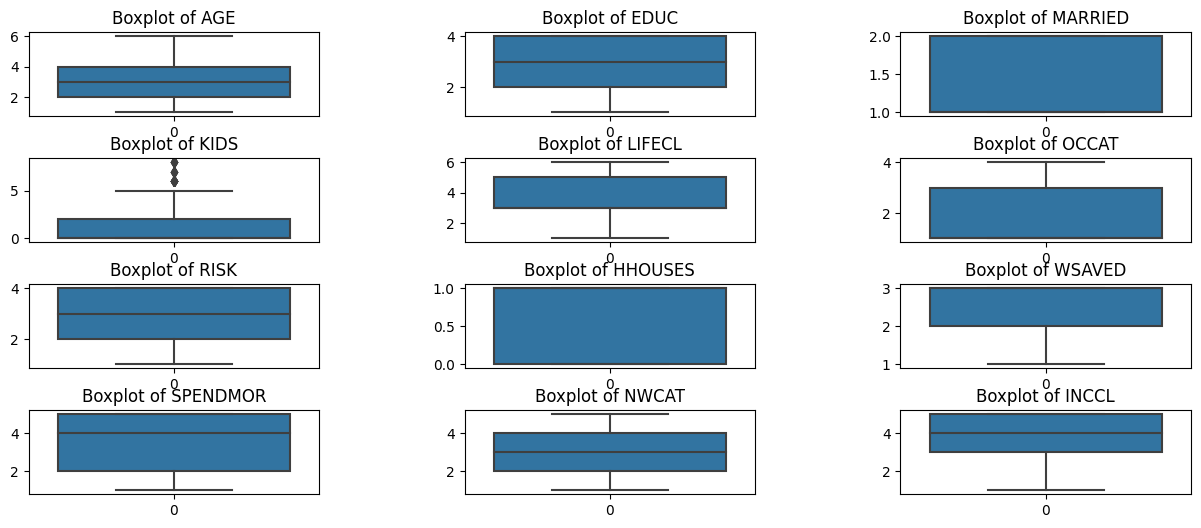

In [4]:
plt.figure(1, figsize=(15,6))
n= 0
for x in ['AGE', 'EDUC', 'MARRIED', 'KIDS', 'LIFECL', 'OCCAT', 'RISK', 'HHOUSES', 'WSAVED','SPENDMOR', 'NWCAT', 'INCCL']:
  n +=1
  plt.subplot(4, 3, n )
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.boxplot(dataset[x])
  plt.title('Boxplot of {}'.format(x))
plt.show()

<Axes: >

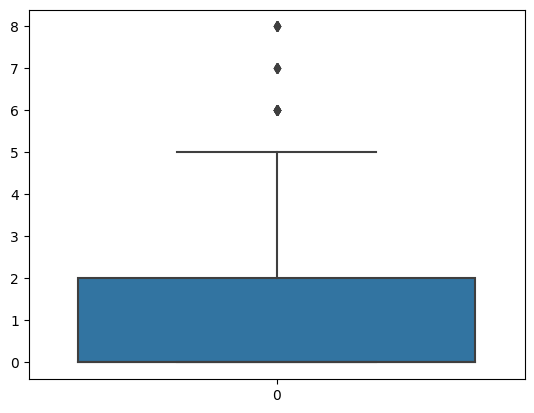

In [5]:
sns.boxplot(dataset['KIDS'])

Selection of outliers links to variable KIDS and removing of those outliers from dataset because K-means is sensitive to them.

In [6]:
Q1 = dataset['KIDS'].quantile(0.25)
Q3 = dataset['KIDS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset = dataset[(dataset['KIDS'] >= lower_bound) & (dataset['KIDS'] <= upper_bound)]


In [7]:
dataset.shape

(3843, 13)

From 3866 rows, we end up with 3843 for our new datasets.

### 3.1.2 Correlation
Let us look at the correlation. We will take a detailed look into the visualization post clustering.



<Axes: title={'center': 'Correlation Matrix'}>

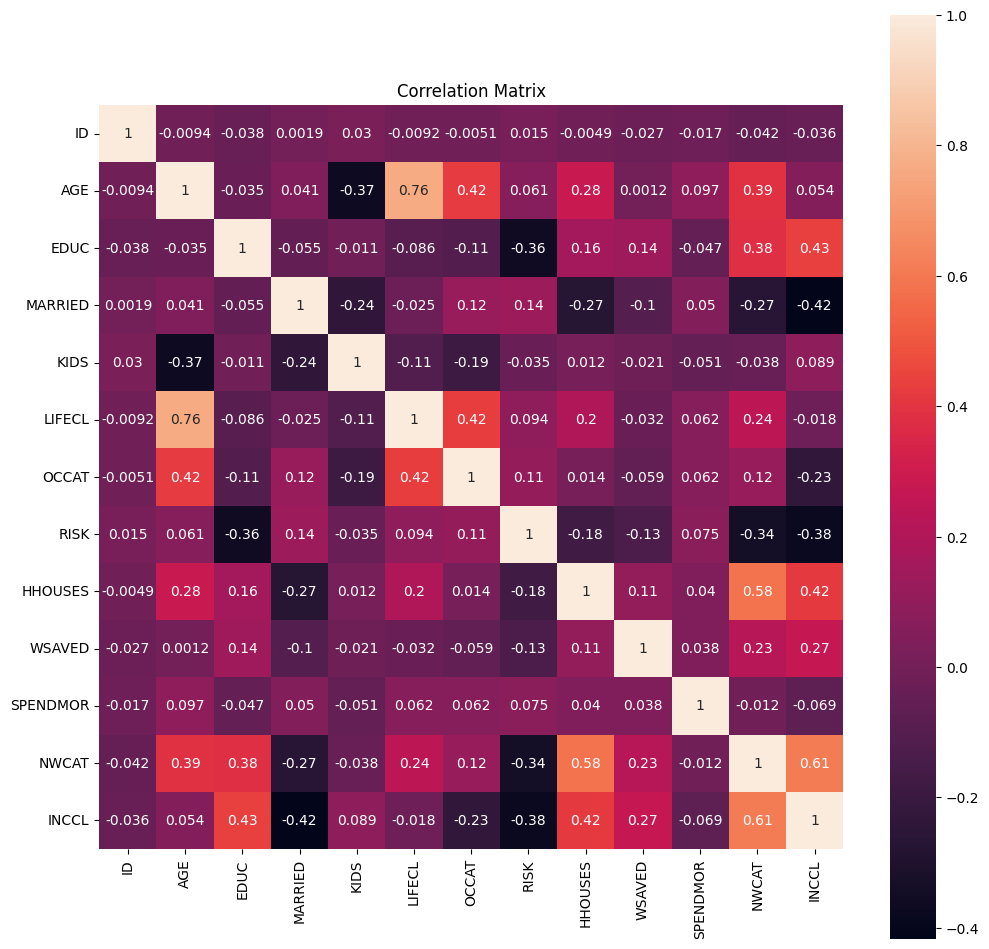

In [11]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='rocket')

As it can be seen by the picture above there is a significant positive correlation between the stocks.

# 4. Data Preparation

## 4.1. Data Cleaning

Let us check for the NAs in the rows, either drop them or fill them with the mean of the column.

In [12]:
dataset.isna().sum()

ID          0
AGE         0
EDUC        0
MARRIED     0
KIDS        0
LIFECL      0
OCCAT       0
RISK        0
HHOUSES     0
WSAVED      0
SPENDMOR    0
NWCAT       0
INCCL       0
dtype: int64

Given there isn't any missing data and the data is already in the categorical format no further data cleaning was performed.

# 5. Evaluate Algorithms and Models
In this step, we will look at the following models and perform further analysis and visualization.

 1. K-means
 2. Affinity Propagation

## 5.1. K-Means Clustering
Here we look at the following metrices to get the optimum number of clusters:

 1. Sum of square errors (SSE) within clusters
 2. Silhouette score.

### 5.1.1. Finding optimal number of clusters

Typically, two metrics are used to evaluate the number of clusters in K-means model.

1. Sum of square errors (SSE) within clusters
2. Silhouette score



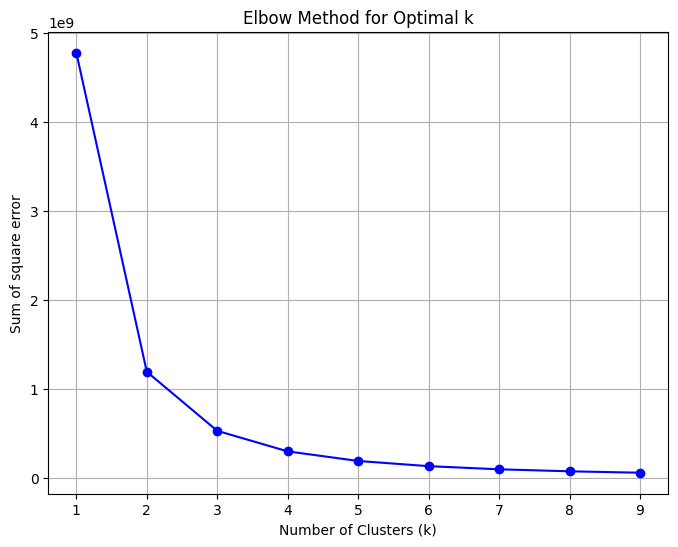

In [15]:
inertia = []

k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of square error')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

### Silhouette score

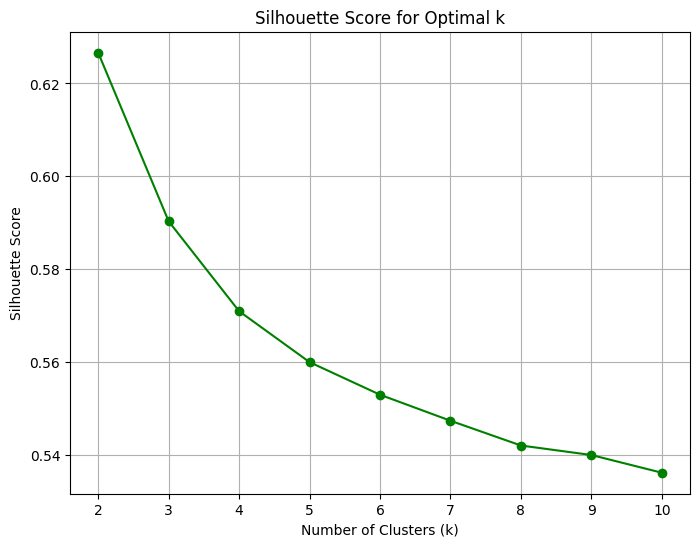

In [14]:
silhouette_scores = []

k_range = range(2, 11)

# Calculate silhouette score for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(dataset)
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

Looking at both the charts above, the optimum number of clusters seem to be around 7. We can see that as the number of clusters increase pass 6, the sum of square of errors within clusters plateaus off. From the second graph, we can see that there are various parts of the graph where a kink can be seen. Since there is not much a difference in SSE after 7 clusters, we would use 7 clusters in the k-means model below.

### 5.1.2. Clustering and Visualisation

In [16]:
nclust=7

In [17]:
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(dataset)

KMeans(n_clusters=7)

In [18]:
target_labels = k_means.predict(dataset)

## 5.2. Affinity Propagation

In [22]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(dataset)
clust_labels2 = ap.predict(dataset)

In [23]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3531


## 5.3. Cluster Evaluation

We evaluate the clusters using Silhouette Coefficient (sklearn.metrics.silhouette_score). Higher Silhouette Coefficient score means a model with better defined clusters.

In [24]:
from sklearn import metrics
print("kmeans", metrics.silhouette_score(dataset, k_means.labels_, metric='euclidean'))
print("Affinity Propagation", metrics.silhouette_score(dataset, ap.labels_, metric='euclidean'))

kmeans 0.5473029781787635
Affinity Propagation 0.022507804868740502


k-means has much higher Silhouette Coefficient as compared to the affinity propagation.

# 6. Cluster Intuition

In the next step, we will check each cluster and understand the intuition behind the clusters.

In [25]:
cluster_output= pd.concat([pd.DataFrame(dataset), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
output=cluster_output.groupby('cluster').mean()
output

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,,
0.0,846.023423,3.147748,2.902703,1.385586,0.890090,3.742342,1.706306,3.043243,0.702703,2.434234,3.518919,2.954955,3.639640
1.0,3035.818854,3.038817,2.992606,1.349353,0.885397,3.646950,1.719039,3.012939,0.711645,2.421442,3.449168,2.961183,3.630314
2.0,1951.514760,3.125461,2.905904,1.321033,0.961255,3.754613,1.736162,3.007380,0.747232,2.476015,3.573801,2.977860,3.752768
3.0,3572.422642,3.181132,2.828302,1.354717,0.967925,3.724528,1.747170,3.069811,0.726415,2.392453,3.554717,2.935849,3.639623
4.0,283.500000,3.204947,3.014134,1.321555,0.825088,3.743816,1.777385,3.012367,0.745583,2.455830,3.632509,3.160777,3.784452
5.0,1401.030797,2.951087,2.940217,1.378623,0.923913,3.556159,1.731884,3.036232,0.684783,2.500000,3.538043,2.983696,3.682971
6.0,2494.078505,3.164486,2.788785,1.366355,0.889720,3.762617,1.764486,3.104673,0.706542,2.450467,3.695327,2.902804,3.586916


### Demographics Features

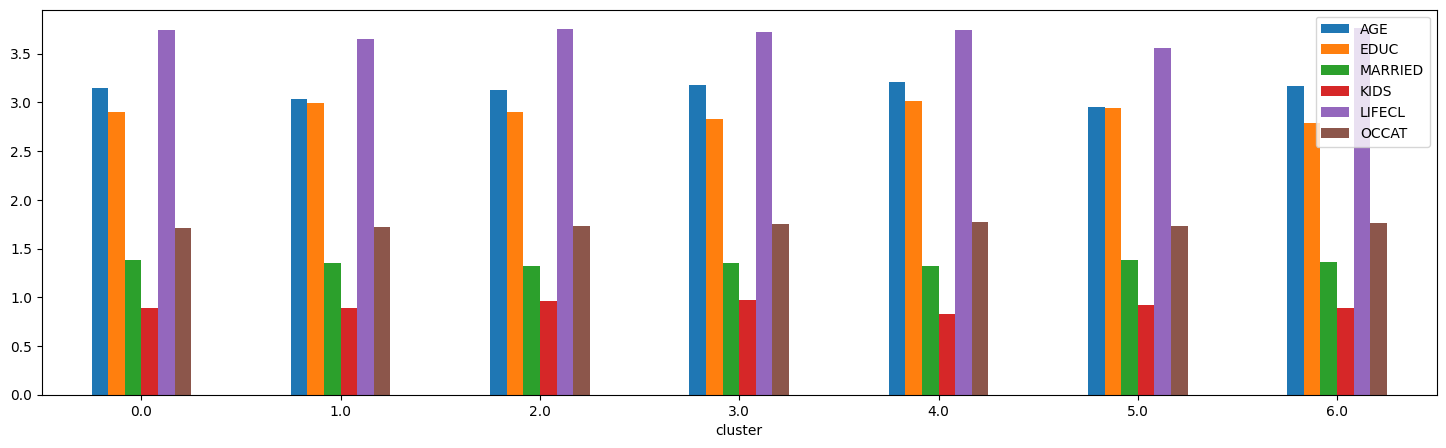

In [26]:
output[['AGE','EDUC','MARRIED','KIDS','LIFECL','OCCAT']].plot.bar(rot=0, figsize=(18,5));


The plot here shows the average value of the attributes for each of the clusters. For example, comparing cluster 0 and cluster 1, cluster 0 has lower average age, yet higher average education. In terms of marriage and number of children, these two clusters are similar. So, the individuals in cluster 0 will on an average have higher risk tolerance as compared to the individuals in cluster 1, based on the demographic attributes.

### Financial Features and Features related to willingness to take risk

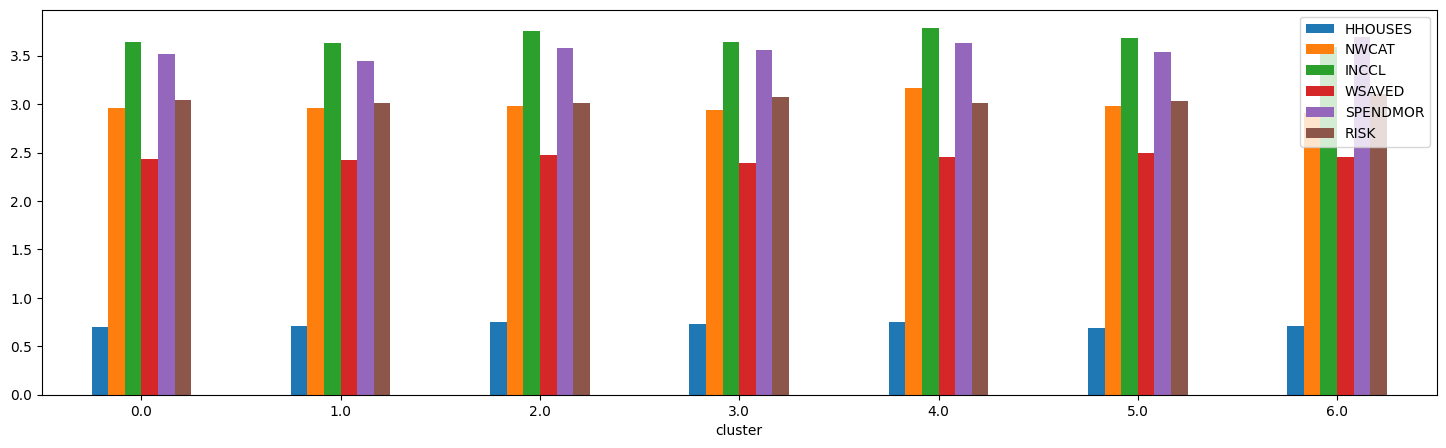

In [27]:
output[['HHOUSES','NWCAT','INCCL','WSAVED','SPENDMOR','RISK']].plot.bar(rot=0, figsize=(18,5));


The plot here shows the average value of the attributes for each of the cluster on the financial and behavioral attributes. For example, comparing cluster 0 and cluster 1, cluster 0 has higher average house ownership, higher average net worth and income, and a lower willingness to take risk. In terms of saving vs. income comparison and willingness to save, the two clusters are comparable. Therefore, we can posit that the individuals in cluster 0 will, on average, have a higher ability, yet lower willingness, to take risk compared with cluster 1.

<Axes: xlabel='cluster'>

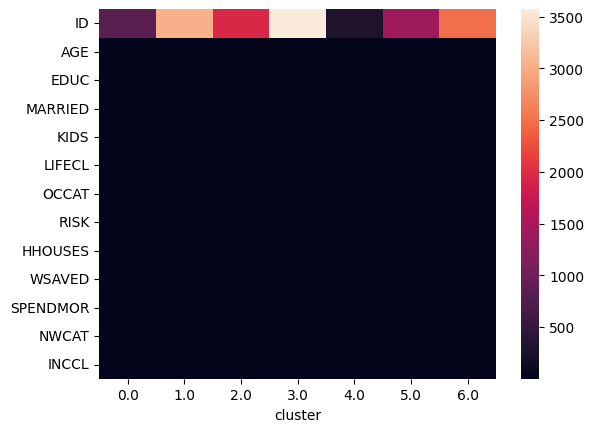

In [30]:
sns.heatmap(output.T)

Combining the information from the demographics, financial, and behavioral attributes for cluster 0 and cluster 1, the overall ability to take risk for individual cluster 0 is higher as compared to cluster 1. Performing similar analysis across all other clusters, we summarize the results in the table below. The risk tolerance column represents the subjective assessment of the risk tolerance of each of the clusters.



| Cluster | Features | Risk Capacity |
|----------|----------|----------|
|Cluster 0 | Low Age, High Networth and Income, Less risky life category, willingness to spend more | High |
|Cluster 1 | High Age, low net worth and Income, highly risky life category, Willing ness to take risk, low education | High |
|Cluster 2 | High Age, high net worth and Income, highly risky life category, Willing ness to to take risk, own house | Medium |
|Cluster 3 | Low age, very low income and net worth, high willingness to take risk, many kids | Low |
|Cluster 4 | Medium age, very high income and net worth, high willingness to take risk, many kids, own house | High |
|Cluster 5 | Low age, very low income and net worth, high willingness to take risk, no kids | Medium |
|Cluster 6 | Low age, medium income and net worth, high willingness to take risk, many kids, own house | Low |




# 6. Visualization

## 6.1 PCA

For visualizations, we can use the method to reduce dimensionality, PCA. For them we are going to use the Prince library, focused on exploratory analysis and dimensionality reduction. If you prefer, you can use Sklearn’s PCA, they are identical.

In [31]:
pca_3d_object, df_pca_3d = get_pca_3d(dataset, k_means.labels_)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)
print("The variability is :", pca_3d_object.eigenvalues_summary)


NameError: ignored

In [ ]:
pca_2d_object, df_pca_2d = get_pca_2d(dataset, k_means.labels_)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)

## 6.2 t-SNE

In [ ]:
from sklearn.manifold import TSNE

sampling_data = dataset.sample(frac=0.5, replace=True, random_state=1)
sampling_clusters = pd.DataFrame(k_means.labels_).sample(frac=0.5, replace=True, random_state=1)[0].values

df_tsne_3d = TSNE(
                  n_components=3,
                  learning_rate=500,
                  init='random',
                  perplexity=200,
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
df_tsne_3d["cluster"] = sampling_clusters
plot_pca_3d(df_tsne_3d, title = "PCA Space", opacity=1, width_line = 0.1)

In [ ]:
df_tsne_2d = TSNE(
                  n_components=2,
                  learning_rate=500,
                  init='random',
                  perplexity=200,
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=["comp1", "comp2"])
df_tsne_2d["cluster"] = sampling_clusters

plot_pca_2d(df_tsne_2d, title = "PCA Space", opacity=1, width_line = 0.5)

# Conclusion
One of the key takeaways from this case study is the approach to understand the cluster intuition. We used visualization techniques to understand the expected behavior of a cluster member by qualitatively interpreting mean values of the variables in each cluster.

We demonstrate the efficiency of the clustering technique in discovering the natural intuitive groups of different investors based on their risk tolerance.

Given, the clustering algorithms can successfully group investors based on different factors, such as age, income, and risk tolerance, it can further used by portfolio managers to understand the investor’s behavior and standardize the portfolio allocation and rebalancing across the clusters, making the investment management process faster and effective.

In [ ]:
 pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 2.0 MB/s eta 0:00:00


In [ ]:
import prince
from sklearn.decomposition import PCA
import plotly.express as px


def get_pca_2d(df, predict):

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):

    pca_3d_object = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    fig = px.scatter_3d(
          df,
          x='comp1',
          y='comp2',
          z='comp3',
          color='cluster',
          template="plotly",

          # symbol = "cluster",

          color_discrete_sequence=px.colors.qualitative.Vivid,
          title=title).update_traces(
              # mode = 'markers',
              marker={
                  "size": 4,
                  "opacity": opacity,
                  # "symbol" : "diamond",
                  "line": {
                      "width": width_line,
                      "color": "black",
                  }
              }
          ).update_layout(
                  width = 800,
                  height = 800,
                  autosize = True,
                  showlegend = True,
                  legend=dict(title_font_family="Times New Roman",
                              font=dict(size= 20)),
                  scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                              yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                              zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                  font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()



def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    columns = df.columns[0:3].tolist()


    fig = px.scatter(df,
                        x=columns[0],
                        y=columns[1],
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",

                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800,
                                height = 700,
                                autosize = False,
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))


    fig.show()